In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras

2024-02-08 20:44:18.778567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 20:44:18.778595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 20:44:18.779635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 20:44:18.785888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 20:44:19.928696: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv('AI_Human.csv')

In [3]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


<Axes: xlabel='generated'>

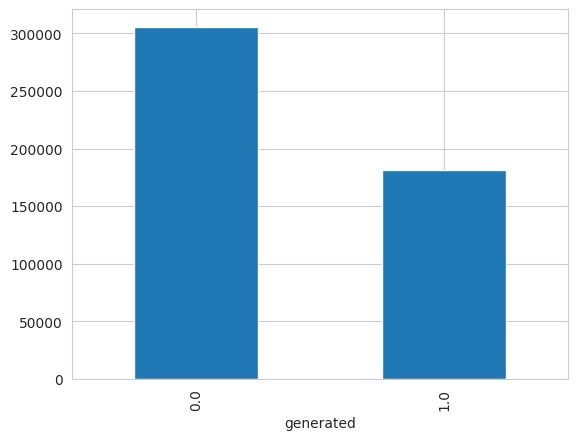

In [4]:
df['generated'].value_counts().plot(kind='bar')

In [5]:
df.text.str.len().describe()

count    487235.000000
mean       2269.586592
std         988.814028
min           1.000000
25%        1583.000000
50%        2102.000000
75%        2724.000000
max       18322.000000
Name: text, dtype: float64

In [6]:
X = df['text']
y = df['generated']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, shuffle=False)

In [8]:
vocab_size = 50000
embedding_dim = 80
max_length = 4500
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [10]:
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

2024-02-08 04:50:07.864343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-08 04:50:10.247461: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-08 04:50:10.247657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4500, 80)          4000000   
                                                                 
 flatten (Flatten)           (None, 360000)            0         
                                                                 
 dense (Dense)               (None, 128)               46080128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50080257 (191.04 MB)
Trainable params: 50080257 (191.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(padded, y_train, epochs=2, validation_data=(testing_padded, y_test))

2024-02-08 04:52:57.041414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 7016184000 exceeds 10% of free system memory.


Epoch 1/2


2024-02-08 04:54:08.411479: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-08 04:54:08.811392: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4a183277f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-08 04:54:08.811416: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-08 04:54:08.849860: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-08 04:54:08.909311: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1707378848.983259    6091 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12180/12181 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9941

2024-02-08 05:02:01.173692: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1754046000 exceeds 10% of free system memory.


12181/12181 [==============================] - 499s 40ms/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 2/2
12181/12181 [==============================] - 410s 34ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9987
